In [1]:
import pandas as pd
import numpy as np

In [2]:
# Loading filtered_df_2
# Path to the Parquet file
file_path = 'filtered_df_2.parquet'
# Load the Parquet file into a DataFrame
df = pd.read_parquet(file_path)
# Display the first few rows
print(df.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  trip_duration  \
0         1  2023-11-01 00:03:03   2023-11-01 01:04:08      61.083333   
1         2  2023-11-01 00:03:50   2023-11-01 00:04:59       1.150000   
2         2  2023-11-01 00:06:30   2023-11-01 00:14:25       7.916667   
3         2  2023-11-01 00:17:18   2023-11-01 00:23:39       6.350000   
4         2  2023-11-01 00:14:49   2023-11-01 00:39:44      24.916667   

   pickup_hour pickup_day_of_week  passenger_count  trip_distance  RatecodeID  \
0            0          Wednesday              2.0          13.60         1.0   
1            0          Wednesday              1.0           0.39         1.0   
2            0          Wednesday              1.0           1.20         1.0   
3            0          Wednesday              3.0           0.60         1.0   
4            0          Wednesday              1.0           5.44         1.0   

   PULocationID  DOLocationID  payment_type  fare_amount  tip_amount  \
0 

In [3]:
# Aggregate the number of trips for pickup and drop-off locations
pickup_aggregation = (
    df.groupby('PULocationID')
    .size()
    .reset_index(name='Pickup_Trips')
    .rename(columns={'PULocationID': 'location_id'})  # Rename to match gdf_zones key
)

dropoff_aggregation = (
    df.groupby('DOLocationID')
    .size()
    .reset_index(name='Dropoff_Trips')
    .rename(columns={'DOLocationID': 'location_id'})  # Rename to match gdf_zones key
)

In [4]:
dropoff_aggregation

,location_id,Dropoff_Trips
0,1,86948
1,2,57
2,3,1898
3,4,116446
4,5,151
...,...,...
257,261,153371
258,262,488600
259,263,660093
260,264,148373


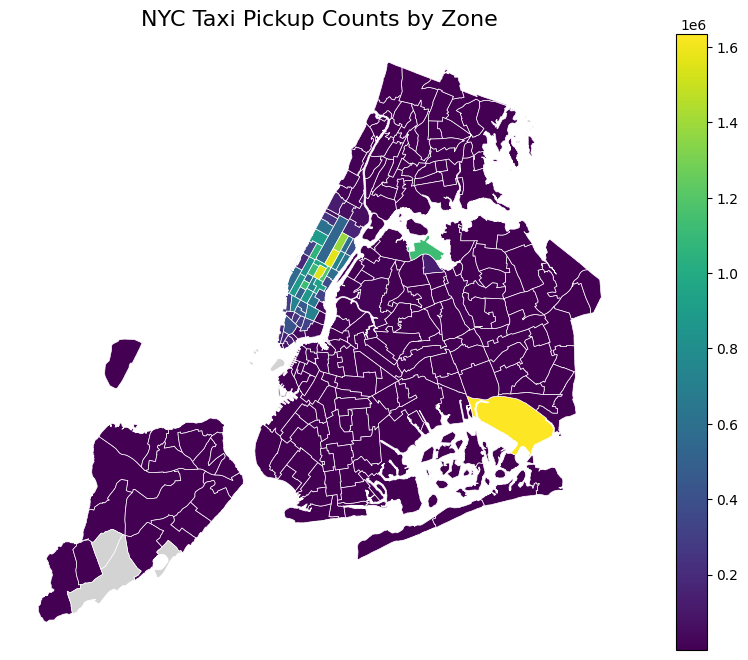

In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# 2. Read the NYC Taxi Zones GeoJSON file
gdf_zones = gpd.read_file('NYC Taxi Zones.geojson')

# 3. Ensure matching data types for merging
pickup_aggregation['location_id'] = pickup_aggregation['location_id'].astype(str)

# 4. Read the NYC Taxi Zones GeoJSON file
gdf_zones = gpd.read_file('NYC Taxi Zones.geojson')
gdf_zones['location_id'] = gdf_zones['location_id'].astype(str)

# 5. Merge the pickup counts with the GeoDataFrame
gdf_merged = gdf_zones.merge(pickup_aggregation, on='location_id', how='left')

# 6. Plot a choropleth, coloring by 'pickup_count'
ax = gdf_merged.plot(
    column='Pickup_Trips',  # The column to color by
    cmap='viridis',            # Color scheme
    legend=True,            # Show a legend (color bar)
    linewidth=0.5,          # Line width for zone boundaries
    edgecolor='white',      # Edge color
    missing_kwds={"color": "lightgrey"},  # Zones without data in grey
    figsize=(12, 8)
)

ax.set_title("NYC Taxi Pickup Counts by Zone", fontsize=16)
ax.axis('off')  # Turn off axis lines and labels

plt.show()

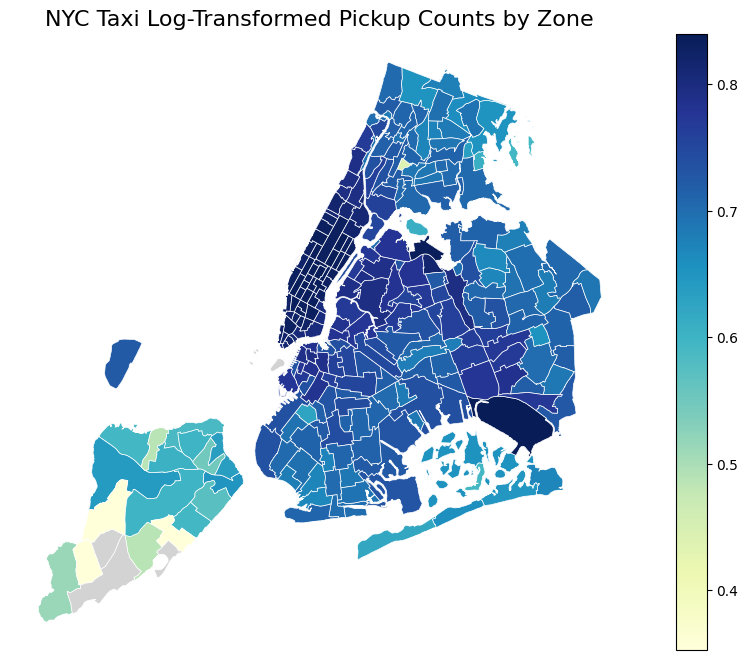

In [9]:
# 2. Read the NYC Taxi Zones GeoJSON file
gdf_zones = gpd.read_file('NYC Taxi Zones.geojson')

# 3. Ensure matching data types for merging
pickup_aggregation['location_id'] = pickup_aggregation['location_id'].astype(str)

# 4. Read the NYC Taxi Zones GeoJSON file
gdf_zones = gpd.read_file('NYC Taxi Zones.geojson')
gdf_zones['location_id'] = gdf_zones['location_id'].astype(str)

# 5. Apply log transformation to pickup counts to reduce skewness
pickup_aggregation['Pickup_Trips'] = pickup_aggregation['Pickup_Trips'].apply(lambda x: np.log1p(x))

# 6. Merge the pickup counts with the GeoDataFrame
gdf_merged = gdf_zones.merge(pickup_aggregation, on='location_id', how='left')

# 7. Plot a choropleth, coloring by log-transformed 'Pickup_Trips'
ax = gdf_merged.plot(
    column='Pickup_Trips',  # The column to color by
    cmap='YlGnBu',            # Color scheme
    legend=True,            # Show a legend (color bar)
    linewidth=0.5,          # Line width for zone boundaries
    edgecolor='white',      # Edge color
    missing_kwds={"color": "lightgrey"},  # Zones without data in grey
    figsize=(12, 8)
)

ax.set_title("NYC Taxi Log-Transformed Pickup Counts by Zone", fontsize=16)
ax.axis('off')  # Turn off axis lines and labels

plt.show()


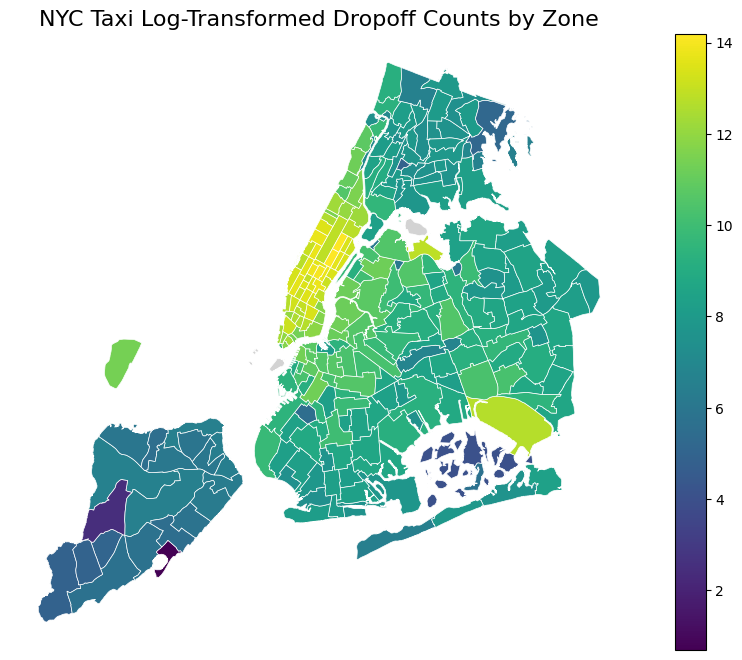

In [18]:
# 2. Read the NYC Taxi Zones GeoJSON file
gdf_zones = gpd.read_file('NYC Taxi Zones.geojson')

# 3. Ensure matching data types for merging
dropoff_aggregation['location_id'] = dropoff_aggregation['location_id'].astype(str)

# 4. Read the NYC Taxi Zones GeoJSON file
gdf_zones = gpd.read_file('NYC Taxi Zones.geojson')
gdf_zones['location_id'] = gdf_zones['location_id'].astype(str)

# 5. Apply log transformation to pickup counts to reduce skewness
dropoff_aggregation['Dropoff_Trips'] = dropoff_aggregation['Dropoff_Trips'].apply(lambda x: np.log1p(x))

# 6. Merge the pickup counts with the GeoDataFrame
gdf_merged = gdf_zones.merge(dropoff_aggregation, on='location_id', how='left')

# 7. Plot a choropleth, coloring by log-transformed 'Dropoff_Trips'
ax = gdf_merged.plot(
    column='Dropoff_Trips',  # The column to color by
    cmap='viridis',            # Color scheme
    legend=True,            # Show a legend (color bar)
    linewidth=0.5,          # Line width for zone boundaries
    edgecolor='white',      # Edge color
    missing_kwds={"color": "lightgrey"},  # Zones without data in grey
    figsize=(12, 8)
)

ax.set_title("NYC Taxi Log-Transformed Dropoff Counts by Zone", fontsize=16)
ax.axis('off')  # Turn off axis lines and labels

plt.show()


In [22]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

ValueError: x must have 2 complete cycles requires 48 observations. x only has 24 observation(s)